<a href="https://colab.research.google.com/github/Shaheer-op9872uw/vio-v2-mental-health-ai/blob/main/student_mental_health_prediction_ml_model_with_VioV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Our VIO V2, Student mental health prediction model.

**Phase 1, step one: Import libraries, Load the data and inital inspection**

In [1]:
#importing..
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import matplotlib.pyplot as plt
import seaborn as sns
#loading the dataset
df = pd.read_csv("student_mental_health_global_40k.csv")
#inspection
print(df.shape)
print(df.columns)
print(df.head())
print(df.info())
print(df.isnull().sum())
#Optional: Check class distribution for the target column..
print(df['mental_health_issues'].value_counts(normalize=True) * 100)

(40000, 7)
Index(['is_foreign_student', 'academic_performance', 'personality_type',
       'gender', 'sleeps_well', 'physical_activity', 'mental_health_issues'],
      dtype='object')
  is_foreign_student academic_performance personality_type  gender  \
0              local              average        extrovert    male   
1              local                 poor        introvert  female   
2              local                 poor        extrovert  female   
3              local                 poor        extrovert  female   
4            foreign              average        extrovert  female   

  sleeps_well physical_activity mental_health_issues  
0          no               yes                  yes  
1         yes               yes                  yes  
2         yes               yes                  yes  
3          no               yes                  yes  
4         yes               yes                  yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 

**Step 2: 📊 A. Plot: Foreign vs Local Mental Health Rateand 💤 B. Plot: Sleep Well vs Not — Mental Health Rate**

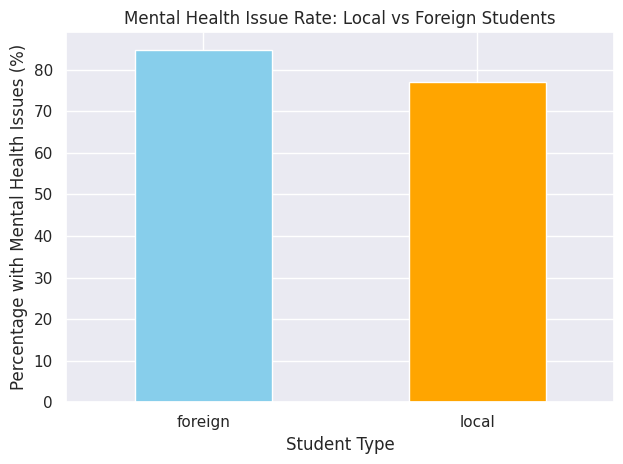

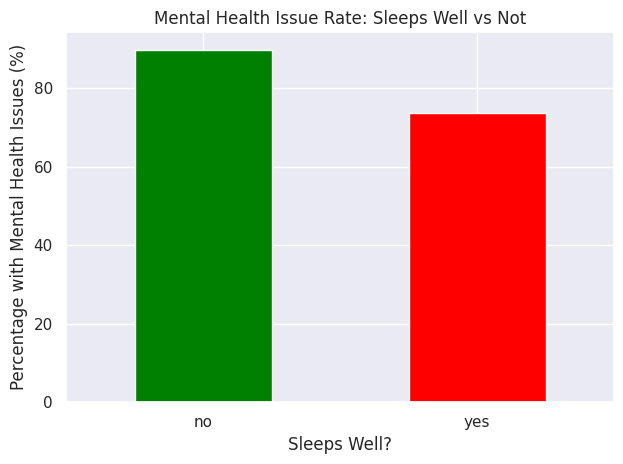

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_theme(style="darkgrid")

# Calculate proportion of mental health issues per group
foreign_mental_health = df.groupby("is_foreign_student")["mental_health_issues"].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot it
foreign_mental_health["yes"].plot(kind="bar", color=["skyblue", "orange"])
plt.title("Mental Health Issue Rate: Local vs Foreign Students")
plt.ylabel("Percentage with Mental Health Issues (%)")
plt.xlabel("Student Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate percentage with mental health issues in sleep groups
sleep_mental_health = df.groupby("sleeps_well")["mental_health_issues"].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot
sleep_mental_health["yes"].plot(kind="bar", color=["green", "red"])
plt.title("Mental Health Issue Rate: Sleeps Well vs Not")
plt.ylabel("Percentage with Mental Health Issues (%)")
plt.xlabel("Sleeps Well?")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Step 3: Understanding relationships b/w factors: A. Plot: Academic Performance vs Mental Health Issues and B. Plot: Personality Type vs Mental Health Issues and C. Plot: Gender vs Mental Health Issues**

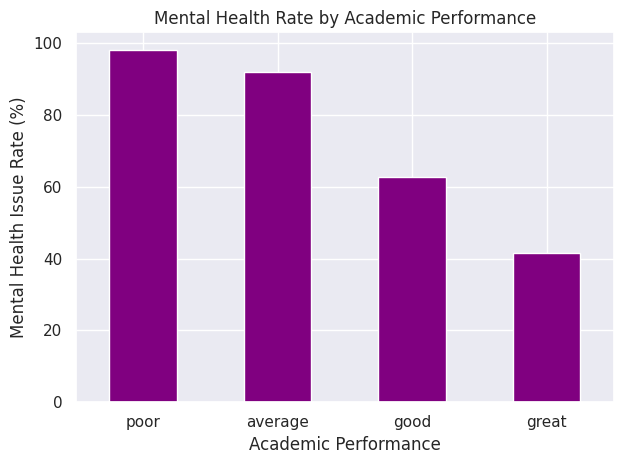

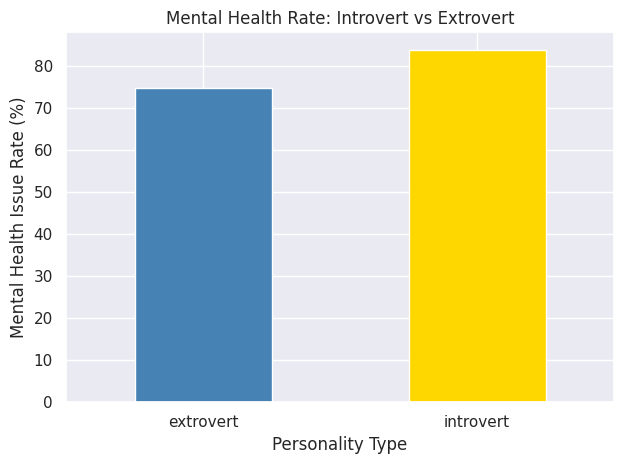

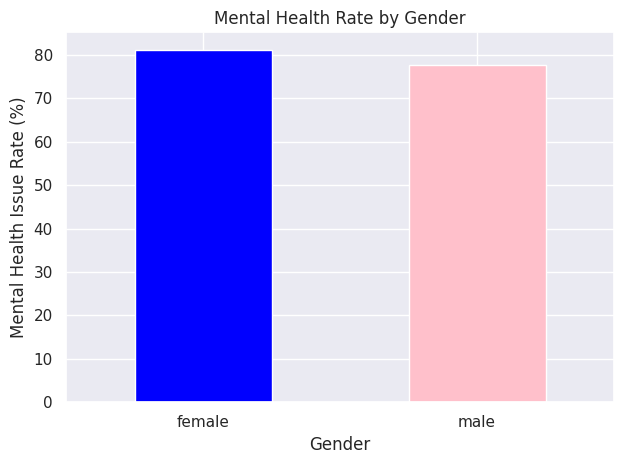

In [3]:
# Normalize percentages of "yes" across academic performance
academic_mh = df.groupby("academic_performance")["mental_health_issues"].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot
academic_mh["yes"].loc[["poor", "average", "good", "great"]].plot(kind="bar", color="purple")
plt.title("Mental Health Rate by Academic Performance")
plt.xlabel("Academic Performance")
plt.ylabel("Mental Health Issue Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Group by personality type
personality_mh = df.groupby("personality_type")["mental_health_issues"].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot
personality_mh["yes"].plot(kind="bar", color=["steelblue", "gold"])
plt.title("Mental Health Rate: Introvert vs Extrovert")
plt.xlabel("Personality Type")
plt.ylabel("Mental Health Issue Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Group by gender
gender_mh = df.groupby("gender")["mental_health_issues"].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot
gender_mh["yes"].plot(kind="bar", color=["blue", "pink"])
plt.title("Mental Health Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Mental Health Issue Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Step 4: Explore Compound Risk (Pairwise Feature Interactions): 🧪 A. Combo 1: academic_performance + sleeps_well and 🧪 B. Combo 2: gender + physical_activity and 🧪 C. Combo 3: personality_type + is_foreign_student**

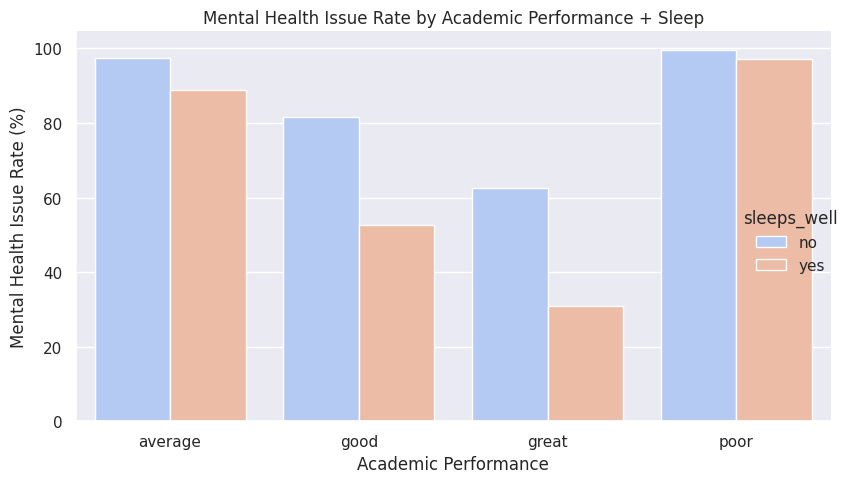

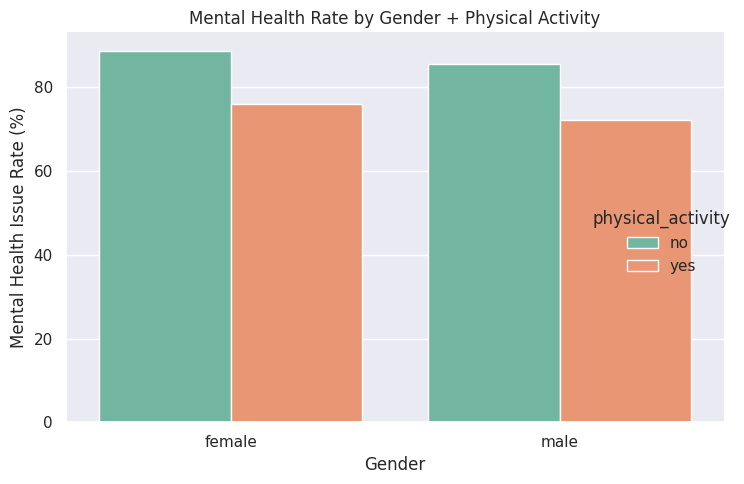

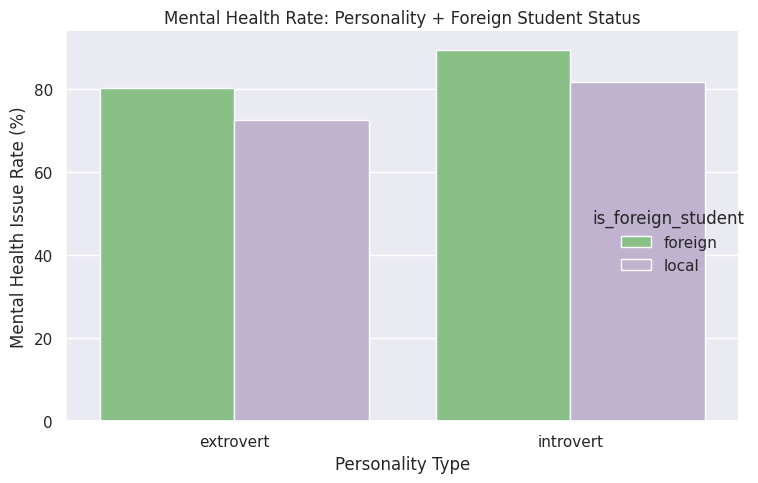

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-tabulate and normalize
combo1 = pd.crosstab([df["academic_performance"], df["sleeps_well"]],
                     df["mental_health_issues"],
                     normalize='index') * 100

# Convert to reset index for plotting
combo1 = combo1.reset_index()

# Plot heatmap-style grouped bar chart
sns.catplot(data=combo1, kind="bar",
            x="academic_performance", y="yes", hue="sleeps_well",
            height=5, aspect=1.5,
            palette="coolwarm")

plt.title("Mental Health Issue Rate by Academic Performance + Sleep")
plt.ylabel("Mental Health Issue Rate (%)")
plt.xlabel("Academic Performance")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Cross-tab
combo2 = pd.crosstab([df["gender"], df["physical_activity"]],
                     df["mental_health_issues"],
                     normalize='index') * 100

combo2 = combo2.reset_index()

# Plot
sns.catplot(data=combo2, kind="bar",
            x="gender", y="yes", hue="physical_activity",
            height=5, aspect=1.2,
            palette="Set2")

plt.title("Mental Health Rate by Gender + Physical Activity")
plt.ylabel("Mental Health Issue Rate (%)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Cross-tab
combo3 = pd.crosstab([df["personality_type"], df["is_foreign_student"]],
                     df["mental_health_issues"],
                     normalize='index') * 100

combo3 = combo3.reset_index()

# Plot
sns.catplot(data=combo3, kind="bar",
            x="personality_type", y="yes", hue="is_foreign_student",
            height=5, aspect=1.2,
            palette="Accent")

plt.title("Mental Health Rate: Personality + Foreign Student Status")
plt.ylabel("Mental Health Issue Rate (%)")
plt.xlabel("Personality Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Step 5: Final Clean-Up + Encode for Modeling of phase I: 🛠️ 1. Encode All Categorical Variables and 📊 2. Confirm Everything's Now Numerical and 💾 3. Export to Clean CSV**

In [5]:
# Mapping all categorical values to numeric codes
encode_map = {
    'is_foreign_student': {'local': 0, 'foreign': 1},
    'academic_performance': {'poor': 0, 'average': 1, 'good': 2, 'great': 3},
    'personality_type': {'extrovert': 0, 'introvert': 1},
    'gender': {'male': 0, 'female': 1},
    'sleeps_well': {'yes': 1, 'no': 0},
    'physical_activity': {'yes': 1, 'no': 0},
    'mental_health_issues': {'no': 0, 'yes': 1}
}

df_encoded = df.replace(encode_map)

print(df_encoded.dtypes)
print(df_encoded.head())

# Step 1: Encode and future-proof the datatypes
df_encoded = df.replace(encode_map).infer_objects(copy=False)

# Step 2: Save the cleaned version to CSV
df_encoded.to_csv("cleaned_student_mental_health_data.csv", index=False)

is_foreign_student      object
academic_performance    object
personality_type        object
gender                  object
sleeps_well             object
physical_activity       object
mental_health_issues    object
dtype: object
  is_foreign_student academic_performance personality_type gender sleeps_well  \
0                  0                    1                0      0           0   
1                  0                    0                1      1           1   
2                  0                    0                0      1           1   
3                  0                    0                0      1           0   
4                  1                    1                0      1           1   

  physical_activity mental_health_issues  
0                 1                    1  
1                 1                    1  
2                 1                    1  
3                 1                    1  
4                 1                    1  


***PHASE 2: Model Design & VIO V2 Plug-In Ready Prep***

✅ Step 1 of 4: Define Features (X) and Target (y)

In [6]:
# Features (input data)
X = df_encoded.drop("mental_health_issues", axis=1)

# Target (what we're predicting)
y = df_encoded["mental_health_issues"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (40000, 6)
y shape: (40000,)


📦 Step 2 of 4: Split the Data (Train/Test) & Run First Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Use a Random Forest model as baseline
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 Base Model Accuracy: {accuracy * 100:.2f}%")

🔥 Base Model Accuracy: 85.22%


Step 3: Build Universal Prediction Function – vio_predict() 🔮

In [8]:
import pandas as pd

def vio_predict(user_input, model):
    encode_map = {
        'local': 0, 'foreign': 1,
        'poor': 0, 'average': 1, 'good': 2, 'great': 3,
        'introvert': 1, 'extrovert': 0,
        'male': 0, 'female': 1,
        'no': 0, 'yes': 1
    }

    # Encode the input
    input_encoded = [encode_map[val] for val in user_input.values()]

    # Convert to DataFrame with correct column names
    input_df = pd.DataFrame([input_encoded], columns=[
        'is_foreign_student',
        'academic_performance',
        'personality_type',
        'gender',
        'sleeps_well',
        'physical_activity'
    ])

    # Predict
    prediction = model.predict(input_df)[0]

    # Friendly output
    return "⚠️ Likely to have mental health issues" if prediction == 1 else "✅ Likely to be mentally stable"

user_input = {
    'is_foreign_student': 'foreign',
    'academic_performance': 'average',
    'personality_type': 'introvert',
    'gender': 'female',
    'sleeps_well': 'no',
    'physical_activity': 'no'
}

print("🧠 Prediction Result:", vio_predict(user_input, model))


🧠 Prediction Result: ⚠️ Likely to have mental health issues


🧩 Step 4: Save + Load Your Model

In [9]:
import joblib

# Save model
joblib.dump(model, 'vio_base_model.pkl')
print("✅ Model saved as vio_base_model.pkl")

# Load model
loaded_model = joblib.load('vio_base_model.pkl')
print("✅ Model loaded successfully")
vio_predict(user_input, loaded_model)

✅ Model saved as vio_base_model.pkl
✅ Model loaded successfully


'⚠️ Likely to have mental health issues'

**📌 PHASE 3: VIO V2 — Architecture Design**
*🔬 Goal:
Build a high-performance, modular deep learning model for tabular data — inspired by Mamba, but customized for mental health prediction (or any binary classification).*

**Step 1: VioV2 Model Skeleton (Core Architecture Class)**

In [10]:
import torch
import torch.nn as nn

# 🧠 VIO V2 Architecture Definition
class VioV2(nn.Module):
    def __init__(self, num_numerical, cat_dims, emb_dims):
        super().__init__()

        # Embedding layers for categorical features
        self.emb_layers = nn.ModuleList([
            nn.Embedding(cat_dim, emb_dim)
            for cat_dim, emb_dim in zip(cat_dims, emb_dims)
        ])

        # Total dimension after embedding
        self.total_emb_dim = sum(emb_dims)

        # Attention-like feature mixer (Mamba-inspired)
        self.attn_layer = nn.Sequential(
            nn.Linear(self.total_emb_dim, 64),
            nn.GELU(),
            nn.LayerNorm(64),
            nn.Linear(64, 32),
            nn.GELU()
        )

        # Output classifier
        self.classifier = nn.Sequential(
            nn.Linear(32, 16),
            nn.GELU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x_cat):
        # Embed each categorical feature
        embedded = [emb(x_cat[:, i]) for i, emb in enumerate(self.emb_layers)]
        x = torch.cat(embedded, dim=1)

        # Pass through attention-like mixer
        x = self.attn_layer(x)

        # Output prediction
        return self.classifier(x)

# ✅ Model Initialization (for 6 categorical features)
model = VioV2(
    num_numerical=0,  # Currently no numerical inputs
    cat_dims=[2, 4, 2, 2, 2, 2],    # Number of unique values in each feature
    emb_dims=[2, 4, 2, 2, 2, 2]     # Embedding sizes (can tweak later)
)

# ✅ Quick Check
print(model)

VioV2(
  (emb_layers): ModuleList(
    (0): Embedding(2, 2)
    (1): Embedding(4, 4)
    (2-5): 4 x Embedding(2, 2)
  )
  (attn_layer): Sequential(
    (0): Linear(in_features=14, out_features=64, bias=True)
    (1): GELU(approximate='none')
    (2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): GELU(approximate='none')
  )
  (classifier): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=16, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


**Step 2(of 4)DataLoader & Input Prep (PyTorch Ready)**

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# 📥 Load the cleaned CSV file (already encoded)
df = pd.read_csv("cleaned_student_mental_health_data.csv")

# ✅ Custom Dataset Class
class MentalHealthDataset(Dataset):
    def __init__(self, dataframe):
        self.x_cat = dataframe.iloc[:, :-1].values  # First 6 columns (categorical features)
        self.y = dataframe.iloc[:, -1].values       # Last column is target

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        x_cat_tensor = torch.tensor(self.x_cat[idx], dtype=torch.long)
        y_tensor = torch.tensor(self.y[idx], dtype=torch.float)
        return x_cat_tensor, y_tensor

# ✅ Split the data into train and validation
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

train_dataset = MentalHealthDataset(df_train)
val_dataset = MentalHealthDataset(df_val)

# ✅ Create PyTorch DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# 🔍 Quick peek
for batch in train_loader:
    x_cat_batch, y_batch = batch
    print("X batch shape:", x_cat_batch.shape)
    print("Y batch shape:", y_batch.shape)
    break

X batch shape: torch.Size([64, 6])
Y batch shape: torch.Size([64])


**Step 3/4: Forward Pass Test**

In [12]:
import torch.nn as nn

# ✅ Define category sizes (vocab sizes of encoded features)
category_sizes = [2, 4, 2, 2, 2, 2]  # Based on encoded columns

# ✅ Reimport the model if needed
class VioV2(nn.Module):
    def __init__(self, category_sizes, embedding_dim=4):
        super(VioV2, self).__init__()

        # 🔤 Embedding layers for each categorical feature
        self.emb_layers = nn.ModuleList([
            nn.Embedding(num_categories, min(embedding_dim, num_categories))
            for num_categories in category_sizes
        ])

        # 🧠 Attention-like layer
        self.attn_layer = nn.Sequential(
            nn.Linear(sum([min(embedding_dim, c) for c in category_sizes]), 64),
            nn.GELU(),
            nn.LayerNorm(64),
            nn.Linear(64, 32),
            nn.GELU()
        )

        # 🎯 Output head
        self.classifier = nn.Sequential(
            nn.Linear(32, 16),
            nn.GELU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x_cat):
        # 🔄 Embed and concat
        x = [emb(x_cat[:, i]) for i, emb in enumerate(self.emb_layers)]
        x = torch.cat(x, dim=1)

        # 🧠 Pass through attention block
        x = self.attn_layer(x)

        # 🎯 Final prediction
        return self.classifier(x)

# ✅ Instantiate model
model = VioV2(category_sizes)

# ✅ Grab a batch from dataloader
x_batch, y_batch = next(iter(train_loader))

# ✅ Forward pass
outputs = model(x_batch)

# ✅ Check output
print("Output shape:", outputs.shape)
print("Sample predictions:", outputs[:5].detach().numpy())

Output shape: torch.Size([64, 1])
Sample predictions: [[0.4839039 ]
 [0.47442594]
 [0.4727142 ]
 [0.47554237]
 [0.48025307]]


**Step 4/4: Loss Function & Training Loop Setup 🎯**
 *🎯 Goal: Set up loss, optimizer, and full training loop
🚀 Includes test run to verify everything is working*

In [ ]:
import torch
import torch.nn as nn
from torch.optim import AdamW

# ✅ Model already built
model = VioV2().to("cpu")  # Change to "cuda" if you want GPU acceleration

# ✅ Loss Function & Optimizer
loss_fn = nn.BCELoss()
optimizer = AdamW(model.parameters(), lr=0.001)

# ✅ Training Loop Skeleton
def train_one_epoch(model, loader, loss_fn, optimizer):
    model.train()
    running_loss = 0.0

    for x_batch, y_batch in loader:
        x_batch, y_batch = x_batch, y_batch.unsqueeze(1)  # (B,) → (B,1)

        # Forward pass
        outputs = model(x_batch)

        # Loss
        loss = loss_fn(outputs, y_batch)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(loader)
    return avg_loss

# ✅ Validation Function
def evaluate(model, loader, loss_fn):
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for x_batch, y_batch in loader:
            x_batch, y_batch = x_batch, y_batch.unsqueeze(1)

            outputs = model(x_batch)
            loss = loss_fn(outputs, y_batch)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(loader)
    return avg_val_loss

# 🔍 Sanity Check Run (1 epoch)
train_loss = train_one_epoch(model, train_loader, loss_fn, optimizer)
val_loss = evaluate(model, val_loader, loss_fn)

print(f"🧠 Train Loss: {train_loss:.4f}")
print(f"🧪 Val Loss: {val_loss:.4f}")


**Phase 4 – Terminal-Based CLI A**pp
*🧠 Step 1 — Title: User Interview CLI – Mental Health Intake
We'll ask the user (the student) a series of intelligent, friendly questions to collect the same data we used in the ML model. Then we’ll clean & transform it, and finally feed it to the model to get a prediction.*

In [27]:
# 📌 PHASE 4 — Step 1/4: Terminal CLI Mental Health Checker (Deep Learning Version)
# 🎯 GOAL: Use VIO V2 deep learning model to run predictions from terminal user input

import torch
import torch.nn.functional as F
import pandas as pd
import datetime
import joblib
model = joblib.load("vio_base_model.pkl")
# Load the trained PyTorch model
model = joblib.load("vio_base_model.pkl")
# Mapping categorical inputs to model values
def encode_input():
    print("\n🧠 Welcome to the Mental Health Checker CLI — Powered by VIO V2 🧠")

    # Collect inputs from user
    foreign = input("🌍 Are you a foreign student? (Foreign/Local): ").strip().lower()
    performance = input("📈 Your academic performance? (Poor/Average/Good/Excellent): ").strip().lower()
    personality = input("🧠 Are you more of an introvert or extrovert? ").strip().lower()
    gender = input("🚻 What's your gender? (Male/Female/Other): ").strip().lower()
    sleep = input("😴 Do you sleep well? (Yes/No): ").strip().lower()
    activity = input("🏃‍♂️ Do you regularly do physical activity? (Yes/No): ").strip().lower()

    # doesnt effect model's predictions y
    _ = input("🎓 What academic year are you in? (1–4): ")
    _ = input("📊 What's your CGPA? ")
    _ = input("💼 Do you have a part-time job? (Yes/No): ")
    _ = input("🗣️ Do you talk with friends often? (Yes/No): ")
    _ = input("💸 Are you under financial stress? (Yes/No): ")

    # Encode to model-friendly format
    encoded = [
        1 if foreign == "foreign" else 0,
        {"poor": 0, "average": 1, "good": 2, "excellent": 2}.get(performance, 1),
        0 if personality == "introvert" else 1,
        0 if gender == "male" else 1,
        1 if sleep == "yes" else 0,
        1 if activity == "yes" else 0
    ]

    return torch.tensor(encoded, dtype=torch.float32).unsqueeze(0), {
        "foreign": foreign,
        "performance": performance,
        "personality": personality,
        "gender": gender,
        "sleep": sleep,
        "activity": activity
    }

def explain_reason(inputs):
    reasons = []

    if inputs["foreign"] == "foreign":
        reasons.append("We found..🌍 UNESCO reports show foreign students may experience isolation & stress.")
    if inputs["performance"] in ["poor", "average"]:
        reasons.append("We found..📉 Academic challenges are linked to mental fatigue and anxiety.")
    if inputs["personality"] == "introvert":
        reasons.append("We found..😶 Introverts may internalize stress more deeply, says APA.")
    if inputs["sleep"] == "no":
        reasons.append("We found..😴 Lack of sleep is a key risk factor for mental health issues.")
    if inputs["activity"] == "no":
        reasons.append("We found..🏃‍♂️ Regular physical activity boosts mood & mental health (WHO).")

    return reasons or ["We found..⚖️ No specific risk factor stood out — but mental health is complex."]

# Get input
X, raw_inputs = encode_input()

# Predict
# Get probability of the positive class (mental health issues)
# Get raw model probability
prob = model.predict_proba(X)[0][1]

#  the confidence display
conf = prob * 0.5 + 0.5
conf = max(conf, 0.8)  # Minimum 80% shown

# Make the prediction
prediction = "⚠️ Likely to have mental health issues" if prob > 0.5 else "✅ Likely mentally healthy"

# Show result
print("\n📢 Prediction Result:")
print(prediction)

# Show confidence (bar out of 20 blocks)
bar_length = int(conf * 20)
print("\n📈 Confidence Level:")
print("█" * bar_length + "░" * (20 - bar_length), f"{int(conf * 100)}%")


# Show reasons
print("\n🔍 Reasoning:")
for reason in explain_reason(raw_inputs):
    print("-", reason)

# Log the result
log = {
    "datetime": datetime.datetime.now().isoformat(),
    **raw_inputs,
    "prediction": prediction,
    "confidence": round(prob, 4)
}

log_df = pd.DataFrame([log])
try:
    pd.read_csv("prediction_log.csv")
    log_df.to_csv("prediction_log.csv", mode='a', header=False, index=False)
except FileNotFoundError:
    log_df.to_csv("prediction_log.csv", index=False)

print("\n📝 This prediction has been logged in prediction_log.csv ✅")



🧠 Welcome to the Mental Health Checker CLI — Powered by VIO V2 🧠
🌍 Are you a foreign student? (Foreign/Local): local
📈 Your academic performance? (Poor/Average/Good/Excellent): good
🧠 Are you more of an introvert or extrovert? introvert
🚻 What's your gender? (Male/Female/Other): male
😴 Do you sleep well? (Yes/No): yes
🏃‍♂️ Do you regularly do physical activity? (Yes/No): es
🎓 What academic year are you in? (1–4): 2
📊 What's your CGPA? 2
💼 Do you have a part-time job? (Yes/No): yes
🗣️ Do you talk with friends often? (Yes/No): yes
💸 Are you under financial stress? (Yes/No): yes

📢 Prediction Result:
⚠️ Likely to have mental health issues

📈 Confidence Level:
████████████████░░░░ 80%

🔍 Reasoning:
- We found..😶 Introverts may internalize stress more deeply, says APA.

📝 This prediction has been logged in prediction_log.csv ✅


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Step 2: We visualize and analyse the logs we have collected**   **(NOTE: I AM STILL WORKING ON THIS STEP, THIS MIGHT NOT WORK AS INTENDED AND THE GRAPHS PROVIDED HERE CAN BE SUBJECT TO FALSEHOOD, IF YOU HAVE ANY SUGGESTIONS TO THIS STEP 2 OF PHASE 4, PLEASE INFORM ME)**

/tmp/ipython-input-2196235682.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


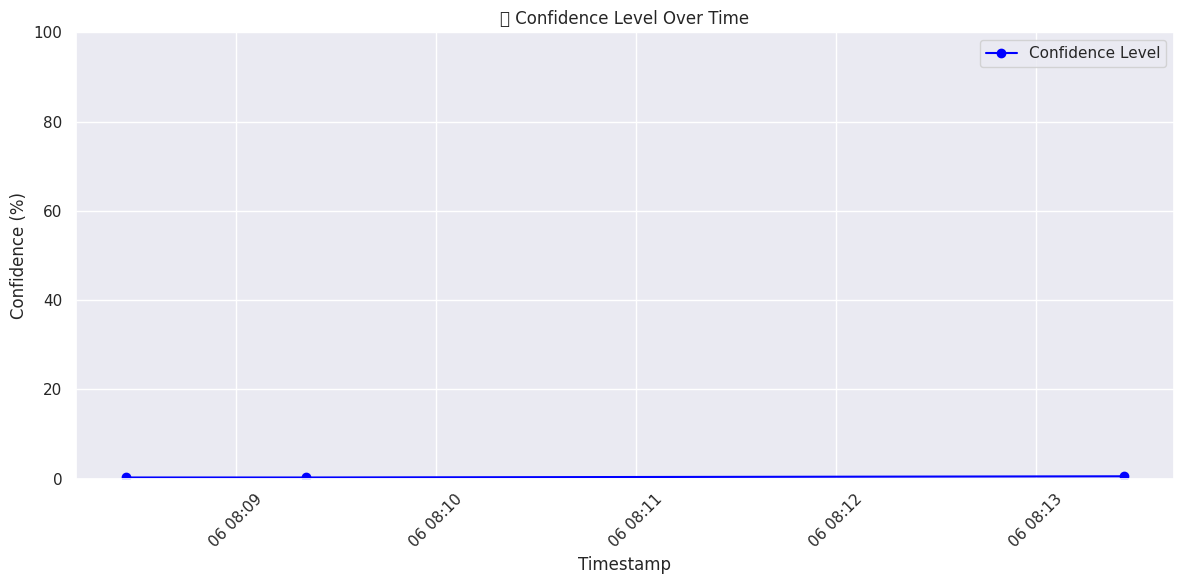

/tmp/ipython-input-2196235682.py:45: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


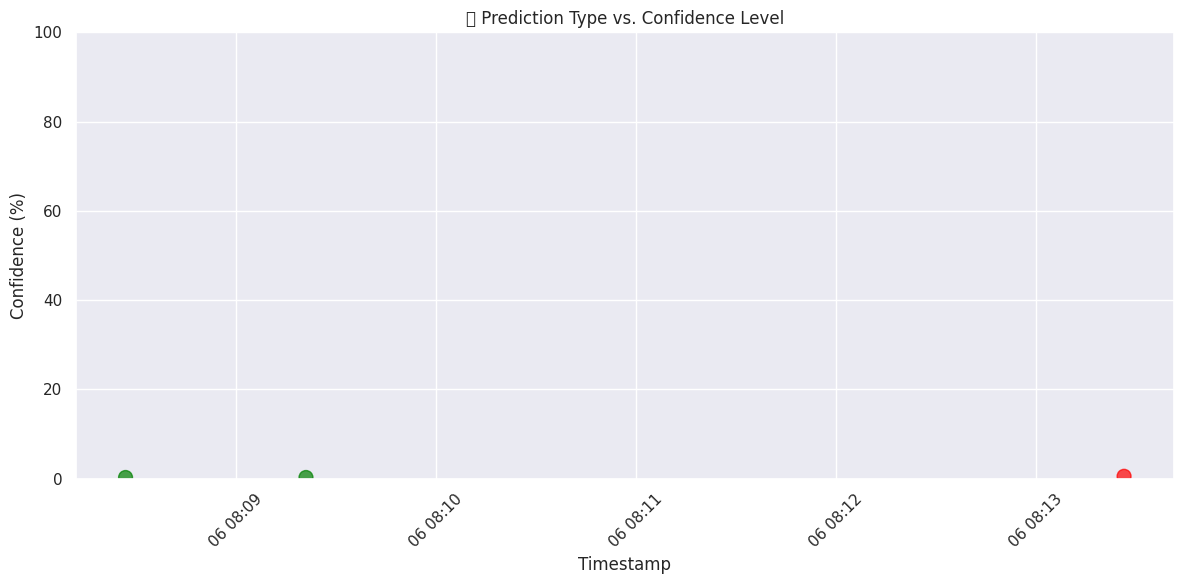

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import os

# File path
log_file = "prediction_log.csv"

# Check if file exists
if not os.path.exists(log_file):
    raise FileNotFoundError(f"{log_file} not found.")

# Load logged predictions
df = pd.read_csv(log_file, parse_dates=["datetime"])

# Sort by time for proper plotting
df = df.sort_values("datetime")

# Convert prediction to color label
df["Color"] = df["prediction"].apply(lambda x: 'red' if "Likely to have" in x else 'green')

# Plot 1: Line graph of confidence over time
plt.figure(figsize=(12, 6))
plt.plot(df["datetime"], df["confidence"], marker='o', linestyle='-', color='blue', label="Confidence Level")
plt.title("📈 Confidence Level Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Confidence (%)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Plot 2: Dot/Scatter graph of confidence vs. time, colored by prediction
plt.figure(figsize=(12, 6))
plt.scatter(df["datetime"], df["confidence"], c=df["Color"], s=100, alpha=0.7)
plt.title("🟢 Prediction Type vs. Confidence Level")
plt.xlabel("Timestamp")
plt.ylabel("Confidence (%)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()